In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
random_state = 42

# Load the Diabetes dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target 

# binarizing the target
y = y>=np.median(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [3]:
# Create and fit the Random Forest Regressor model
model = DecisionTreeClassifier(random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [4]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f'Classifier Accuracy: {acc}')

Classifier Accuracy: 0.6741573033707865


## Feature Importance in Decision Tree

In a binary Decision Tree, if we represent the set of all nodes with $A$ and the set of all nodes splitting on the $i$ th feature with $B_i$, then the feature importance $F_i$ for the $i$ th feature is computed as follows:

$F_i = \frac{\sum_{j \in B_i} N_j}{\sum_{j \in A} N_j}$

Here, $N_j$ represents the node importance for the $j$ th node that is computed using the following formula:

$N_j = p_j \times  M_j - p_j^{Left} \times M_j^{Left} -  p_j^{Right} \times M_j^{Right}$

where $p_j$, $p_j^{Left}$, and $p_j^{Right}$ represent respectively the percentage of samples reaching the $j$ th node, the left subtree and the right subtree of the $j$ the node. Similarly, $M_j$, $M_j^{Left}$, and $M_j^{Right}$ represent respectively the node impurity for the $j$ th node, the left subtree and the right subtree of the $j$ the node.

Depnding on the task (classification or regression) and the splitting criterion, the $M_j$, the node impurity for the $j$ th node, is computed as follows:

|   Task         |   Impurity  |   Formula  | Description  |
| :---:          |    :----:   |   :----:   |          :---: |
| Classification | Gini        |$1 - \sum_{k=1}^{C} f_k^2$              | $f_k$ is the frequency of the label $k$ at a node and C is the number of target classes.|
| Classification | Entropy     |$\sum_{k=1}^{C} -f_k \log(f_k)$          | $f_k$ is the frequency of the label $k$ at a node and C is the number of target classes.|
| Regression     | MSE         |$\frac{1}{N}\sum_{k=1}^{N} (y_k-\mu)^2$  | $N$ is the number of samples, $y_k$ is the value for the $k$ th target, and $\mu$ is average of $y_k$ s.|
| Regression     | MAE         |$\frac{1}{N}\sum_{k=1}^{N} abs(y_k-\mu)$ | $N$ is the number of samples, $y_k$ is the value for the $k$ th target, and $\mu$ is average of $y_k$ s.|

In [5]:

# Retrieve the feature importances and feature names
importances = model.feature_importances_
feature_names = diabetes_data.feature_names

# Create a DataFrame to store the importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)


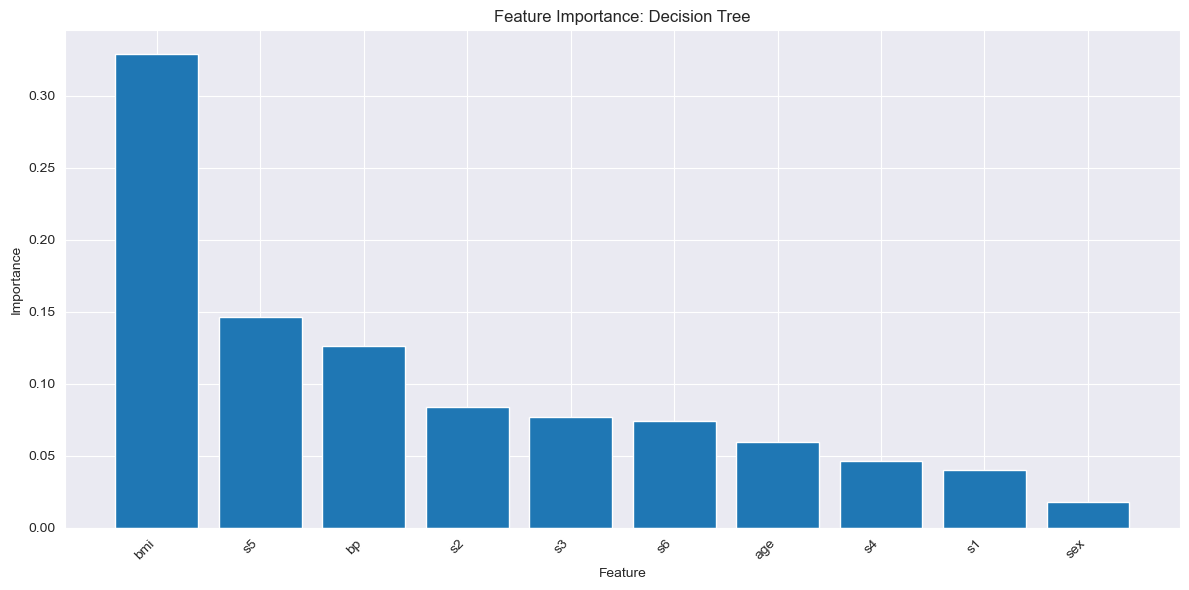

In [6]:

# Create an Actual vs Predicted scatter plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance: Decision Tree')
plt.tight_layout()
plt.show()

The bar plot will display the feature importances calculated by the Decision Tree model for the "Diabetes" dataset. Larger bars indicate higher feature importance, and the sorted order of features helps us understand which features contribute the most to the model's predictions based on the reduction in impurity.

In Decision Trees, the feature importances are calculated based on how much each feature contributes to reducing the impurity (e.g., Gini impurity or entropy) when splitting the data at each node. Features with higher importances have more significant influence on the tree's decisions, as they result in more homogeneous child nodes after splitting.
